1) Implement the generalized equation for finding the gradient of m-samples, each having n-features. Also, implement the gradient descent approach assuming a constant learning rate.

In [ ]:
import numpy as np
import random

def gradient_descent(x,y, z=400):

  y = np.array(y)
  a = np.shape(x)
  if len(a) == 1:
    n = 1
  else:
    n = len(x[0])  # Number of features
  m = len(x)     # Number of samples
  size_x = len(x)
  ones = np.ones(size_x)
  x = np.column_stack((ones, x))
  print(x.shape)
  weights = np.random.rand(n+ 1)
  cost = []

  # z = 4000
  alpha = 0.01

  while z > 0:
      J = 0
      for i in range(m):
        # print(weights.shape, x, y, m)
        J = J + (1 / (2 * m)) * ((np.dot(weights, x[i]) - y[i]) ** 2)
      cost.append(J)


      J_gradient = np.zeros(n+1)

      for i in range(m):
          for j in range(n+1):
              J_gradient[j] += (np.dot(weights, x[i]) - y[i]) * x[i][j]

      J_gradient = J_gradient*(1 / m)
      weights =  weights - alpha * J_gradient

      z -= 1
  return weights,cost



# x = [[3,4],[4,5],[2,3]]
# y = [2,4,1]

x = [3, 4, 5, 6]
y = [8, 9, 9, 13]


weight, cost=(gradient_descent(x,y))
cost

(4, 2)


[11.569132766192567,
 7.187348601059651,
 4.551695096946216,
 2.9663192736310062,
 2.0126735253495696,
 1.439006256159625,
 1.0938917615557546,
 0.8862492128082491,
 0.7612945335036534,
 0.6860757284412677,
 0.6407725494684043,
 0.6134633440290811,
 0.5969773744434871,
 0.5870015239701957,
 0.5809415021655504,
 0.577236872937363,
 0.5749490517566308,
 0.5735134906944935,
 0.5725906205574551,
 0.5719761942872243,
 0.5715473595415701,
 0.5712302219687437,
 0.5709803348881702,
 0.5707709640566387,
 0.5705860290594205,
 0.5704158576378069,
 0.570254631965691,
 0.570098852614158,
 0.5699464146437553,
 0.5697960518845693,
 0.5696470026770505,
 0.5694988088189369,
 0.569351194634137,
 0.5692039942340428,
 0.5690571077660426,
 0.5689104750975005,
 0.5687640599869735,
 0.5686178405633774,
 0.5684718035993168,
 0.5683259410665517,
 0.568180248064161,
 0.5680347215723485,
 0.5678893597028678,
 0.5677441612481761,
 0.567599125410239,
 0.5674542516374184,
 0.5673095395263613,
 0.5671649887629862,
 

2) Using the code developed for problem 1, do the linear regression for the univariate problem using the attached data file univariate_linear_regression.csv. Plot the cost function (both as surface as well as contour) as well as the best fit line.

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving univariate_linear_regression.csv to univariate_linear_regression (1).csv


(200, 2)
[-6.01011653  2.89714169]
(200,)


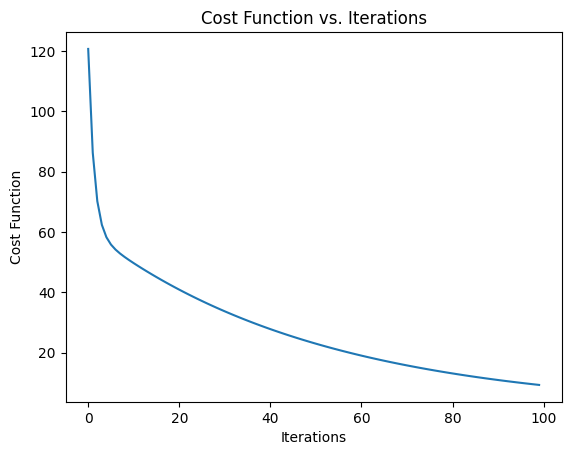

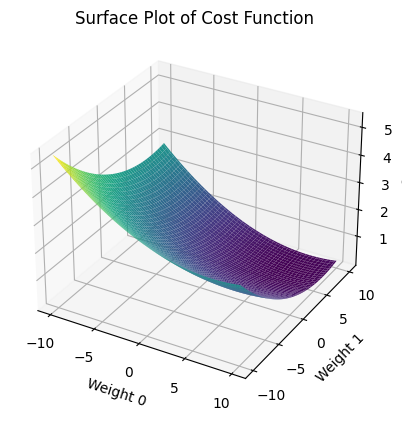

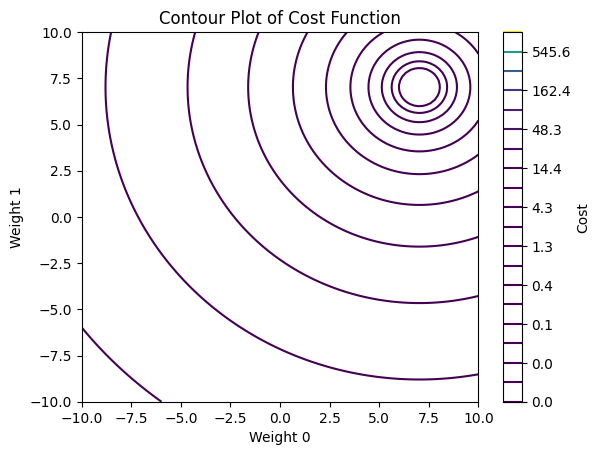

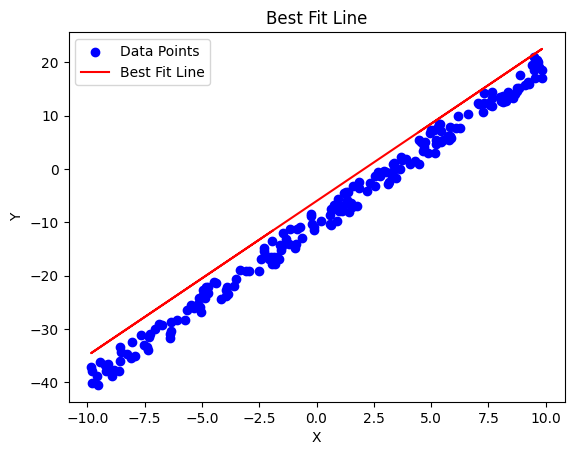

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# def gradient_descent(x, y):
#     n = 2          # Number of features
#     m = len(x)     # Number of samples

#     weights = np.random.rand(n)
#     cost = []
#     z = 4000
#     alpha = 0.01

#     while z > 0:
#         J = 0
#         for i in range(m):
#             J = J +  (1 / (2 * m)) * ((np.dot(weights, x[i])- y[i]) ** 2)

#         cost.append(J)

#         J_gradient = np.zeros(n)

#         for i in range(m):
#             for j in range(n):
#                 J_gradient[j] += (np.dot(weights, x[i]) - y[i]) * x[i][j]

#         J_gradient = J_gradient*(1 / m)
#         weights =  weights - alpha * J_gradient

#         z -= 1

#     print(weights)
#     return weights, cost

#Reading data from csv file
data = pd.read_csv('univariate_linear_regression.csv')

x = data['x']
y = data['y']

# size_x = len(x)
# ones = np.ones(size_x)
# x = np.column_stack((ones, x))
# y = np.array(y)

weights, cost = gradient_descent(x, y, z=100)
cost = np.array(cost)
print(weights)
# Plotting the cost function versus iterations
plt.figure()
plt.plot(np.arange(len(cost)), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iterations')

# # Plotting the surface plot of the cost function
w0_vals = np.linspace(-10, 10, 100)
w1_vals = np.linspace(-10, 10, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)
Z = np.zeros_like(W0)
print(x.shape)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        # print(x.shape, y.shape)
        Z[i, j] = np.sum((np.dot(x[0], np.array([W0[i, j], W1[i, j]])) - y[0]) ** 2) / (2 * len(x))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, Z, cmap='viridis')
ax.set_xlabel('Weight 0')
ax.set_ylabel('Weight 1')
ax.set_zlabel('Cost')
ax.set_title('Surface Plot of Cost Function')

# Plotting the contour plot of the cost function
plt.figure()
plt.contour(W0, W1, Z, levels=np.logspace(-2, 3, 20))
plt.xlabel('Weight 0')
plt.ylabel('Weight 1')
plt.title('Contour Plot of Cost Function')
plt.colorbar(label='Cost')

# Plotting the best fit line
plt.figure()
plt.scatter(data['x'], data['y'], marker='o', color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best Fit Line')
plt.plot(data['x'], weights[0] + weights[1] * data['x'], color='red', label='Best Fit Line')
plt.legend()

plt.show()

3) Using the code developed for problem 1, do the linear regression for the multivariate problem using the attached data file heart.data.csv. Plot the best fit plane for the given data. Can you also interpret the result (taking one independent variable at a time)?

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving heart.data.csv to heart.data.csv


Correlation between Biking and Heart Disease: -0.9354554743738546
Correlation between Smoking and Heart Disease: 0.3091309790873179


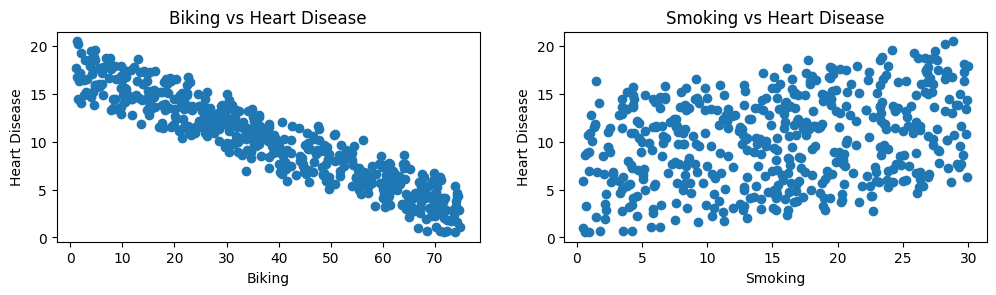

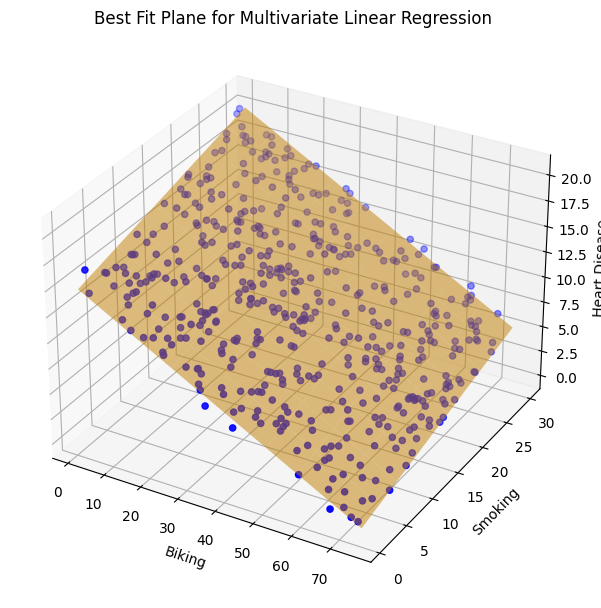

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to calculate the cost (loss) without updating weights
def gradient_descent(x, y):
    n = len(x[0])  # Number of features
    m = len(x)     # Number of samples

    weights_list = np.random.rand(n)

    z = 4000
    alpha = 0.0001

    while z > 0:
        J = 0
        for i in range(m):
            J = J +  (1 / (2 * m)) * ((np.dot(weights_list, x[i]) - y[i]) ** 2)


        J_gradient = np.zeros(n)

        for i in range(m):
            for j in range(n):
                J_gradient[j] += (np.dot(weights_list, x[i]) - y[i]) * x[i][j]

        J_gradient = J_gradient*(1 / m)
        weights_list =  weights_list - alpha * J_gradient

        z -= 1
    return J

#Reading data from csv file
data = pd.read_csv('heart.data.csv')

x0 = data['biking']
x1 = data['smoking']
y = data['heart.disease']

x = np.column_stack((x0, x1))  # Stack x0 and x1 horizontally to form the feature matrix
y = np.array(y)

# Plot scatter graphs for each feature versus output
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.scatter(x0, y)
plt.xlabel('Biking')
plt.ylabel('Heart Disease')
plt.title('Biking vs Heart Disease')

plt.subplot(2, 2, 2)

plt.scatter(x1, y)
plt.xlabel('Smoking')
plt.ylabel('Heart Disease')
plt.title('Smoking vs Heart Disease')

# Calculate correlation coefficients
corr_x0_y = np.corrcoef(x0, y)[0, 1]
corr_x1_y = np.corrcoef(x1, y)[0, 1]

print(f"Correlation between Biking and Heart Disease: {corr_x0_y}")
print(f"Correlation between Smoking and Heart Disease: {corr_x1_y}")

# Define a function to calculate the best fit plane
def best_fit_plane(x0, x1, y):
    A = np.column_stack((np.ones_like(x0), x0, x1))
    b = y
    coeffs, residuals, _, _ = np.linalg.lstsq(A, b, rcond=None)
    return coeffs

# Calculate the coefficients of the best fit plane
coeffs = best_fit_plane(x0, x1, y)

# Plot the best fit plane
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(2, 2, 3, projection='3d')

# Plot the data points
ax.scatter(x0, x1, y, color='blue')

# Generate points for the best fit plane
x0_range = np.linspace(min(x0), max(x0), 10)
x1_range = np.linspace(min(x1), max(x1), 10)
x0_mesh, x1_mesh = np.meshgrid(x0_range, x1_range)
y_predicted = coeffs[0] + coeffs[1] * x0_mesh + coeffs[2] * x1_mesh

# Plot the best fit plane
ax.plot_surface(x0_mesh, x1_mesh, y_predicted, color='orange', alpha=0.5)

ax.set_xlabel('Biking')
ax.set_ylabel('Smoking')
ax.set_zlabel('Heart Disease')
ax.set_title('Best Fit Plane for Multivariate Linear Regression')

plt.tight_layout()
plt.show()


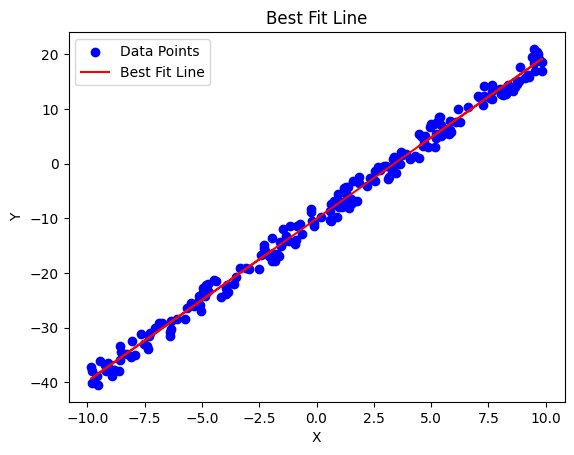

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('univariate_linear_regression.csv')

x = data['x']
y = data['y']

# y = np.array(y)
# a = np.shape(x)
# if len(a) == 1:
#   n = 1
# else:
#   n = len(x[0])  # Number of features
# m = len(x)     # Number of samples
# size_x = len(x)
# # ones = np.ones(size_x)
# # x = np.column_stack((ones, x))
# # print(x.shape)
# weights = np.random.rand(n+ 1)

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m, c

plt.figure()
plt.scatter(data['x'], data['y'], marker='o', color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best Fit Line')
plt.plot(data['x'], c + m * data['x'], color='red', label='Best Fit Line')
plt.legend()

# import matplotlib.pyplot as plt
# _ = plt.plot(x, y, 'o', label='Original data', markersize=10)
# _ = plt.plot(x, m*x + c, 'r', label='Fitted line')
# _ = plt.legend()
# plt.show()